# **JerryCheng-Final Project Notebook-03**

## **For instruction (8)**

Import modules

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

Define the FITS file names

In [24]:
# define file names
fdata_F105W = "hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits"
fdata_F125W = "hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits"
fdata_F160W = "hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits"

# read in data
hdu_2 = fits.open(fdata_F105W)
hdu_3 = fits.open(fdata_F125W)
hdu_4 = fits.open(fdata_F160W)

# get the image data
data_2 = hdu_2[0].data
data_3 = hdu_3[0].data
data_4 = hdu_4[0].data

In [20]:
print(data_2)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


plot the F105W image

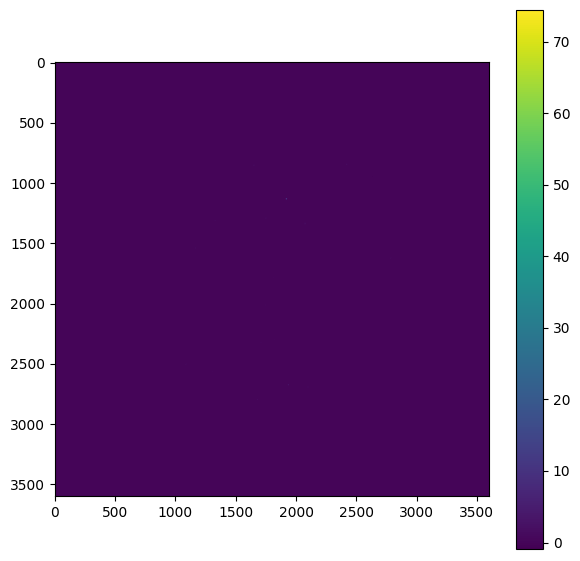

In [21]:
# First, plot the data as is
f = plt.figure(figsize=(7,7))
plt.imshow(data_2)
plt.colorbar()

Define a function to rescale the images to fit visualization needs

In [11]:
def rescale_image(data):
    # copy the data to avoid accidentaly overwriting it
    pdata_tmp = data.copy()

    # compute the mean value over all data, excluding NaN (Not a Number)
    m = np.nanmean(pdata_tmp)

    # if lower than vpmin, apply vpmin
    # if higher than vpmax, apply vpmax
    vpmin = 0.5*m
    vpmax = 100*m
    pdata_tmp[pdata_tmp<vpmin] = vpmin
    pdata_tmp[pdata_tmp>vpmax] = vpmax

    #apply logscale
    pdata_tmp = np.log10(pdata_tmp)
    return pdata_tmp

Use the defined function for a quick look at the F105W

In [12]:
def fits_quicklook(data,fnx=10,fny=10):
    f = plt.figure(figsize=(fnx,fny))
    pdata_tmp = rescale_image(data)
    plt.imshow(pdata_tmp)

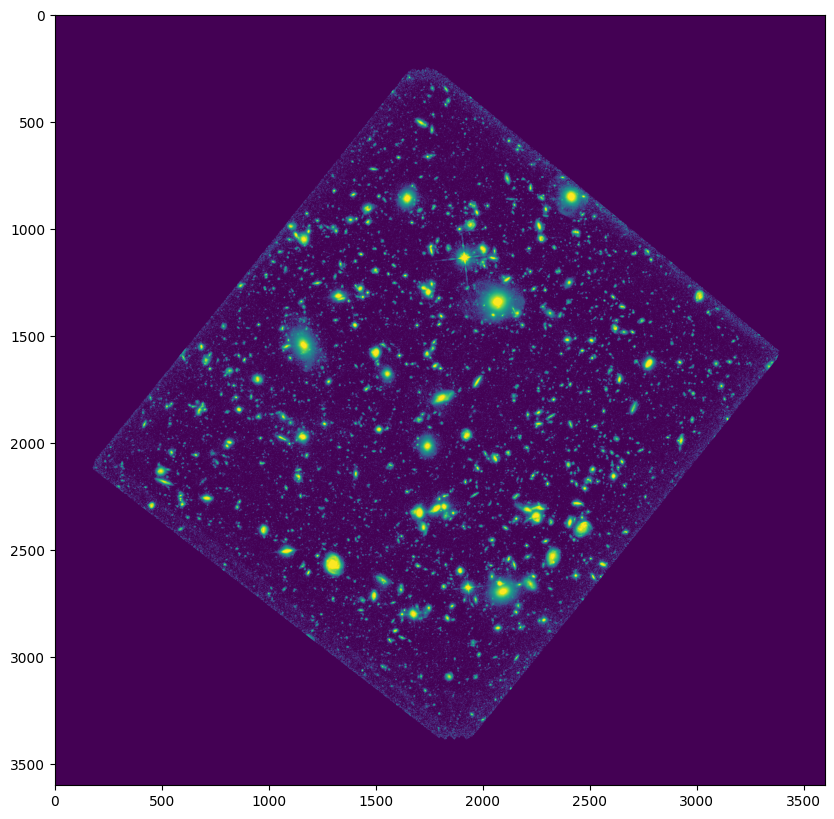

In [13]:
fits_quicklook(data_2)

Rescale the image data from all three bands

In [14]:
data_2_res = rescale_image(data_2)
data_3_res = rescale_image(data_3)
data_4_res = rescale_image(data_4)

Create a new three-dimensional array

In [15]:
data_all = np.zeros((data_2.shape[0],data_2.shape[1],3))

data_all[:,:,0] = data_2
data_all[:,:,1] = data_3
data_all[:,:,2] = data_4

data_all = rescale_image(data_all)

Define a function to map the RGB data to the 0-1 range

In [25]:
def remap(data):

    pdata_tmp = data.copy()

    dmin = pdata_tmp.min()
    dmax = pdata_tmp.max()
    return (pdata_tmp - dmin)/(dmax-dmin)

In [26]:
rgb_image = np.zeros((data_2.shape[0],data_2.shape[1],3))

rgb_image = remap(data_all)

In [ ]:
f,ax = plt.subplots(1,1,figsize=(20,20))
ax.axis('off')
ax.imshow(rgb_image)
plt.savefig('final.png',bbox_inches='tight',pad_inches=0,dpi=600)